## 前置作業

In [557]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import locale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
mpl.rc('font', family='Noto Sans CJK TC')

## 新增資料庫

In [558]:
url1 = 'https://www.nbastuffer.com/2017-2018-nba-team-stats/'
url2 = 'https://www.nbastuffer.com/2018-2019-nba-rest-days-stats/'
df1 = pd.read_html(url1)
df2 = pd.read_html(url2)
df_stand = df1[1]
df_last5 = df1[2]
df_road = df1[3]
df_home =df1[4]
df_b2b = df2[0]




### 處理一下 ＮＡＮ

In [561]:
df_b2b = df_b2b.dropna(1) ##1 是row 的意思
df_stand = df_stand.dropna(1)
df_last5 = df_last5.dropna(1)
df_road = df_road.dropna(1)
df_home =df_home.dropna(1)

In [562]:
pd.set_option('display.width', 1000, 'display.max_rows', 1000)

### 親,由於兩組數據的名稱有點不一樣我想把它合併所以要改他的名稱哦～
由於名稱太長讓人瘮的慌，順便改他改一改

In [563]:
df_stand.rename(columns={ df_stand.columns[16]: "ALL_W",df_stand.columns[17]: "ALL_L",df_stand.columns[18]: "ALL_WINR"}, inplace=True) #inplace 就是確認改動！
df_b2b.rename(columns={ df_b2b.columns[0]: "TEAM",df_b2b.columns[4]: "B2B_GP",df_b2b.columns[5]: "B2B_WR" }, inplace=True) 
df_last5.rename(columns={ df_last5.columns[22]: "LA5_STRK",df_last5.columns[3]: "LA5_GP",df_last5.columns[19]: "LA5_WR" }, inplace=True) 



In [564]:
df_standmb2b = pd.merge(df_stand,df_b2b,how='outer', on='TEAM')

In [565]:
df_Stand_B2B_Last5 = pd.merge(df_standmb2b,df_last5, how ='outer',on='TEAM')

In [566]:
df_NBAdata = df_Stand_B2B_Last5[['TEAM','GP','ALL_W','ALL_L','ALL_WINR','B2B_GP','B2B_WR','LA5_WR','LA5_STRK']]

In [567]:
df_NBAdata

,TEAM,GP,ALL_W,ALL_L,ALL_WINR,B2B_GP,B2B_WR,LA5_WR,LA5_STRK
0,Atlanta,82,24,58,0.293,4,0.500,0.353,L 1
1,Boston,82,55,27,0.671,7,0.429,0.393,W 1
2,Brooklyn,82,28,54,0.341,5,0.400,0.522,L 1
3,Charlotte,82,36,46,0.439,4,0.250,0.623,W 1
4,Chicago,82,27,55,0.329,4,0.250,0.188,L 4
5,Cleveland,82,50,32,0.610,6,0.000,0.579,L 1
6,Dallas,82,24,58,0.293,4,0.250,0.229,L 4
7,Denver,82,46,36,0.561,2,1.000,0.724,L 1
8,Detroit,82,39,43,0.476,4,0.750,0.535,W 1
9,Golden State,82,58,24,0.707,1,1.000,0.337,L 1


## 選取一下ＸＹ然後訓練一下

In [568]:
x=df_NBAdata.iloc[:,[6,7]].values
y = np.array(df_NBAdata.ALL_WINR)

In [569]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 92418) #random_state 使亂數有重複性（亂數種子）

In [570]:
test = LinearRegression()
test.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [571]:
Winr = test.predict(x_test)

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlablel'

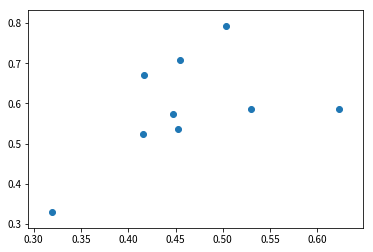

In [575]:
plt.scatter(Winr, y_test )#預測結果與實際結果的作圖
plt.xlablel('predict結果')

## 做一個3D的看看

由於要做3D 可是Z（結果）可能是不等間距的,所以我們用機器幫我們預測出來的數據(一個大平面）來做圖

In [573]:
resol = 100
z=np.zeros((resol,resol)) #先給他一個空白的 array
for i in range(0,resol):
    for j in range(0,resol):
        z[i,j] = test.predict([[1.0/resol*i,1.0/resol*j],])[0,]  #用for把那個平面可以對應的數用出來

AttributeError: module 'matplotlib.pyplot' has no attribute 'zlabel'

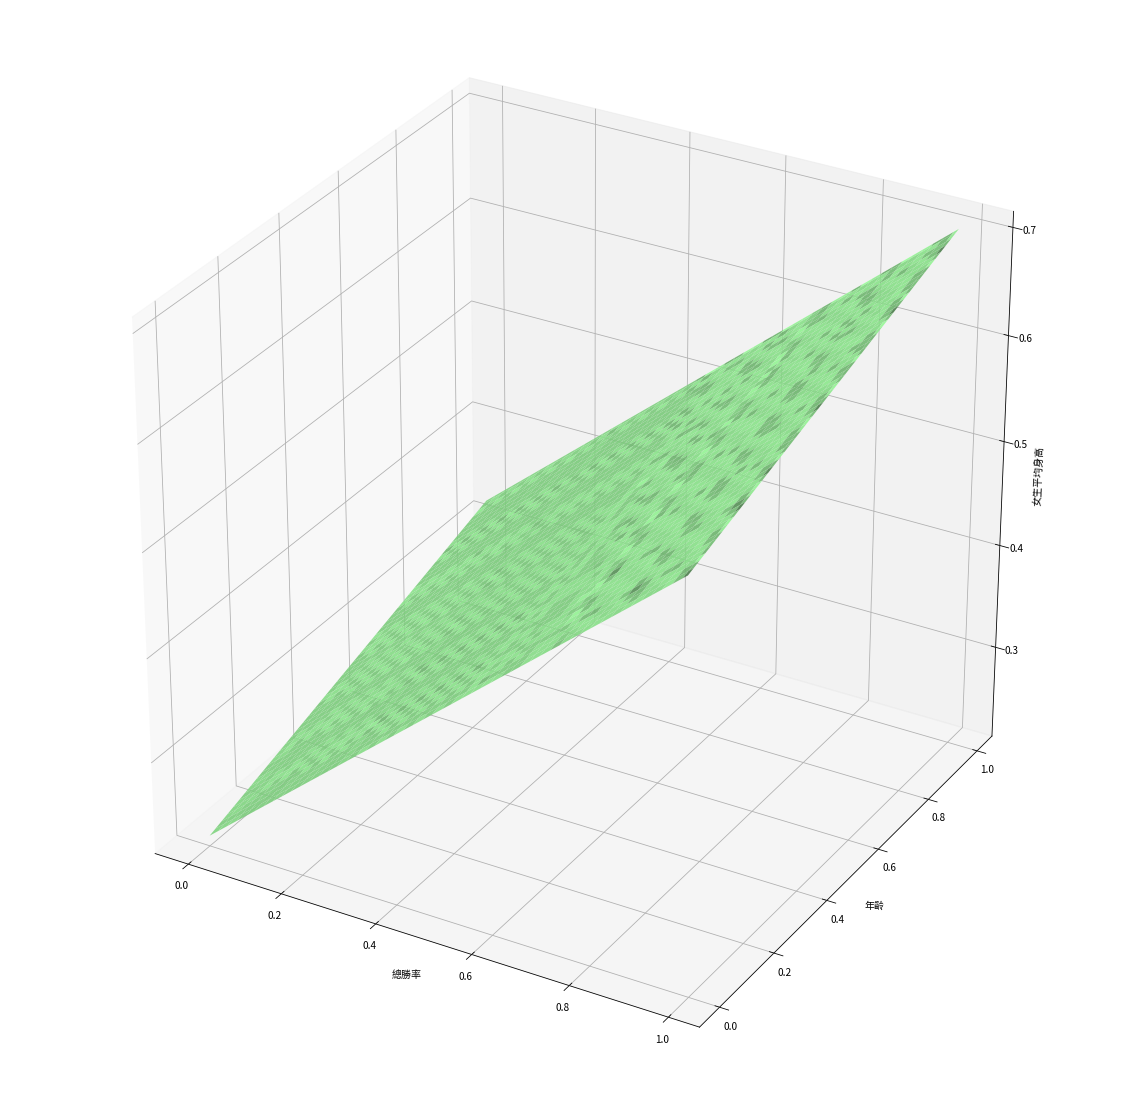

In [574]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1,projection='3d')  
X = np.arange(0, 1, 1.0/resol)
Y = np.arange(0, 1, 1.0/resol)
X,Y = np.meshgrid(X, Y) #使用mesh 決定他的間隔
ax.plot_surface(X, Y, z,color='palegreen', alpha=0.9)

ax.set_xlabel('總勝率')
ax.set_ylabel('年齡')
ax.set_zlabel('女生平均身高')
plt.zlabel("總勝率")
plt.ylabel("近五場勝率")
plt.xlabel('B2B勝率')
for i in range(0,len(x_test)):
    ax.scatter(x_test[i,0],x_test[i,1],y_test[i],c='r',s=500)
